In [5]:
# Установка библиотеки.
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.7 MB/s eta 0:00:00


In [11]:
# Импорт необходимых библиотек.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
import optuna

In [7]:
# Считывание данных из датасета.
data = pd.read_excel('preprocessed_dataset.xlsx')
data

,full_name,age,height,citizenship,player_agent,current_club,joined,outfitter,social_media,link,...,club_trophies_total_score,club_trophies_average_score,club_trophies_max_score,club_trophies_min_score,club_trophies_amount,Defender_Group,Midfielder_Group,Striker_Group,Winger_Group,followers
0,Joško Gvardiol,22.0,1.85,Croatia,1,Manchester City,7,0,"('Instagram', 'http://www.instagram.com/josko_...",https://www.transfermarkt.com/josko-gvardiol/p...,...,303,37.875,81,8,9,2,0,0,0,1199636
1,Nathan Benjamin Aké,29.0,1.80,Netherlands Cote d'Ivoire,1,Manchester City,43,1,http://www.instagram.com/nathanake/,https://www.transfermarkt.com/nathan-ake/profi...,...,303,37.875,81,8,9,2,0,0,0,2227475
2,Sergio Gómez Martín,23.0,1.71,Spain,1,Manchester City,18,0,http://www.instagram.com/sergiogm_10/,https://www.transfermarkt.com/sergio-gomez/pro...,...,303,37.875,81,8,9,1,0,0,1,475430
3,Kyle Andrew Walker,33.0,1.78,England,1,Manchester City,79,1,http://www.instagram.com/kylewalker2/,https://www.transfermarkt.com/kyle-walker/prof...,...,303,37.875,81,8,9,1,0,0,1,4911531
4,Matheus Luiz Nunes,25.0,1.83,Portugal Brazil,1,Manchester City,6,0,"('Instagram', 'http://www.instagram.com/matheu...",https://www.transfermarkt.com/matheus-nunes/pr...,...,303,37.875,81,8,9,0,2,0,0,447746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,João Vítor de Oliveira Florêncio,26.0,1.82,Brazil,0,Nadur Youngsters FC,8,0,NaN,https://www.transfermarkt.com/robinho/profil/s...,...,0,0.000,0,2,0,0,0,1,1,0
16136,Rafael Conrado Prudente,29.0,1.89,Brazil,0,Oratory Youths FC,1,0,NaN,https://www.transfermarkt.com/rafael-conrado/p...,...,0,0.000,0,2,0,0,0,2,0,0
16137,Johandre Jose Padilla Vasquez,26.0,1.82,Colombia,0,Ghajnsielem FC,2,0,NaN,https://www.transfermarkt.com/johandre-padilla...,...,0,0.000,0,2,0,2,0,0,0,0
16138,Cláudio Henrique da Silva Barboza,25.0,1.64,Brazil,0,Ghajnsielem FC,7,0,NaN,https://www.transfermarkt.com/claudio-murici/p...,...,0,0.000,0,2,0,0,0,1,1,0


In [9]:
# Отбираемые признаки
relevant_features = [
    'age',
     'height',
     'player_agent',
     'joined',
     'outfitter',
     'appearances',
     'goals',
     'assists',
     'substitutions_on',
     'substitutions_off',
     'yellow_cards',
     'red_cards',
     'penalty_goals',
     'minutes_played',
     'individual',
     'international',
     'national',
     'other',
     'national_status',
     'national_matches',
     'national_goals',
     'national_assists',
     'national_yellow_cards',
     'national_red_cards',
     'avg_injuries_per_season',
     'avg_injury_duration',
     'is_injured',
     'last_injury_date',
     'club_price',
     'club_statistics_matches',
     'club_statistics_goals',
     'club_statistics_pts',
     'club_league_top_rank',
     'club_league_lowest_rank',
     'club_league_mean_rank',
     'foot_left',
     'foot_right',
     'trophies_total_score',
     'trophies_average_score',
     'trophies_max_score',
     'trophies_min_score',
     'trophies_amount',
     'club_trophies_total_score',
     'club_trophies_average_score',
     'club_trophies_max_score',
     'club_trophies_min_score',
     'club_trophies_amount',
     'Defender_Group',
     'Midfielder_Group',
     'Striker_Group',
     'Winger_Group',
     'followers'
]

In [13]:
# Записываем целевую переменную в y, признаки в X.
X = data[relevant_features]
y = data['current_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Оценка MAE
predictions = rf.predict(X_test)
mae = MAE(y_test, predictions)
print(f'MAE: {mae}')

# Подбор гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и MAE с ними
best_rf = grid_search.best_estimator_
best_predictions = best_rf.predict(X_test)
best_mae = MAE(y_test, best_predictions)
print(f'Best MAE: {best_mae}')


MAE: 1115981.6294919455


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best MAE: 1113684.0092418718


In [15]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_features_options = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    if max_features_options is None:
        max_features = trial.suggest_float('max_features_frac', 0.1, 1.0)
    else:
        max_features = max_features_options
    max_depth = trial.suggest_int('max_depth', 10, 50, log=True)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = MAE(y_test, predictions)

    return mae

In [16]:
X = data[relevant_features]
y = data['current_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Начальное значение MAE.
predictions = rf.predict(X_test)
mae = MAE(y_test, predictions)
print(f'MAE: {mae}')


# Подбор гиперпараметров с помощью Optuna.
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-04-01 12:12:32,436] A new study created in memory with name: no-name-560b9067-b552-4844-8834-57682bbcddaf


MAE: 1115981.6294919455


[I 2024-04-01 12:12:41,859] Trial 0 finished with value: 1274158.7363715267 and parameters: {'n_estimators': 325, 'max_features': 'sqrt', 'max_depth': 14}. Best is trial 0 with value: 1274158.7363715267.
[I 2024-04-01 12:12:53,552] Trial 1 finished with value: 1222789.9867390208 and parameters: {'n_estimators': 160, 'max_features': None, 'max_features_frac': 0.23525362195770533, 'max_depth': 27}. Best is trial 1 with value: 1222789.9867390208.
[I 2024-04-01 12:13:02,641] Trial 2 finished with value: 1299157.555902755 and parameters: {'n_estimators': 226, 'max_features': 'log2', 'max_depth': 34}. Best is trial 1 with value: 1222789.9867390208.
[I 2024-04-01 12:13:08,462] Trial 3 finished with value: 1314455.4628141723 and parameters: {'n_estimators': 157, 'max_features': 'log2', 'max_depth': 30}. Best is trial 1 with value: 1222789.9867390208.
[I 2024-04-01 12:13:18,580] Trial 4 finished with value: 1294474.9887105818 and parameters: {'n_estimators': 251, 'max_features': 'log2', 'max_de

In [17]:
# Вывод лучшего результата и сохранение лучших параметров модели.
best_params = study.best_trial.params

if 'max_features_frac' in best_params:
    best_params['max_features'] = best_params.pop('max_features_frac')

best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)
best_predictions = best_rf.predict(X_test)
best_mae = MAE(y_test, best_predictions)
print(f'Best MAE: {best_mae}')

Best MAE: 1105043.5972714787


In [18]:
# Параметры лучшей модели
best_rf

RandomForestRegressor(max_depth=28, max_features=0.910388084781648,
                      n_estimators=445, random_state=42)

100%|██████████| 50/50 [53:29<00:00, 64.20s/it] 


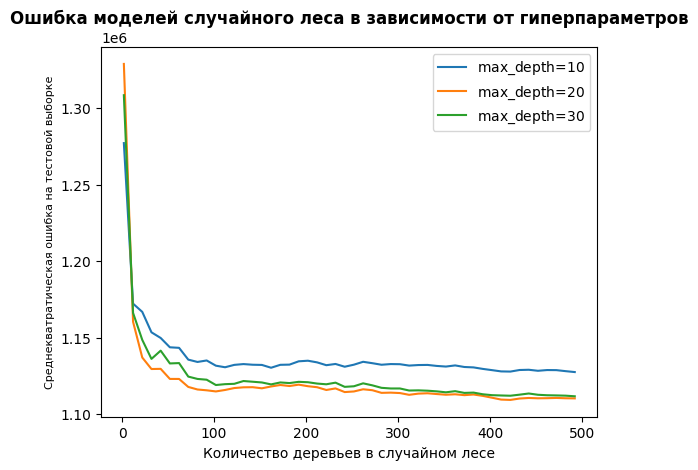

In [28]:
# Сравнение качества моделей в зависимости от количества решающих деревьев
# и максимальной глубины дерева.
from tqdm import tqdm
for max_depth in [10, 20, 30]:
  ns = []
  preds = []
  for n_estimators in tqdm(range(2, 500, 10)):
    rf = RandomForestRegressor(random_state=42, n_estimators=n_estimators, max_depth=max_depth)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    mae = MAE(y_test, predictions)
    ns.append(n_estimators)
    preds.append(mae)
  plt.plot(ns, preds, label=f'max_depth=${max_depth}$')

plt.legend()
plt.title('Ошибка моделей случайного леса в зависимости от гиперпараметров', weight='bold')
plt.xlabel('Количество деревьев в случайном лесе')
plt.ylabel('Среднекватратическая ошибка на тестовой выборке', size=8)
plt.show()